# Time Series Forecasting on Stock Market Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('NIFTY_50.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7387 entries, 0 to 7386
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7387 non-null   object 
 1   Open      7387 non-null   float64
 2   High      7387 non-null   float64
 3   Low       7387 non-null   float64
 4   Close     7387 non-null   float64
 5   Volume    5974 non-null   float64
 6   Turnover  5974 non-null   float64
dtypes: float64(6), object(1)
memory usage: 404.1+ KB


In [3]:
data['Date'] = pd.to_datetime(data['Date'],  dayfirst = True)
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
1990-07-03,0.0,0.0,0.0,279.02,NaN,NaN
1990-07-05,0.0,0.0,0.0,284.04,NaN,NaN
1990-07-06,0.0,0.0,0.0,289.04,NaN,NaN
1990-07-09,0.0,0.0,0.0,289.69,NaN,NaN
1990-07-10,0.0,0.0,0.0,288.69,NaN,NaN


In [4]:
data.describe()

,Open,High,Low,Close,Volume,Turnover
count,7387.000000,7387.000000,7387.000000,7387.000000,5.974000e+03,5.974000e+03
mean,3977.671968,4004.895894,3945.570019,4101.465442,1.636397e+08,6.866885e+10
std,3644.725814,3660.286601,3621.256360,3515.541207,1.612075e+08,7.125257e+10
min,0.000000,0.000000,0.000000,279.020000,1.394931e+06,4.012000e+08
25%,1034.150000,1042.250000,1024.925000,1076.025000,5.887519e+07,2.074620e+10
50%,2764.600000,2806.500000,2708.450000,2770.500000,1.256125e+08,5.206925e+10
75%,6061.100000,6084.125000,6016.675000,6051.800000,1.943081e+08,8.344090e+10
max,13980.900000,14024.850000,13936.450000,13981.950000,1.811564e+09,7.852293e+11


In [5]:
data = data.drop(['Open', 'High', 'Low', 'Volume', 'Turnover'], axis = 1)
data.head()

,Close
Date,
1990-07-03,279.02
1990-07-05,284.04
1990-07-06,289.04
1990-07-09,289.69
1990-07-10,288.69


## Plot time series data

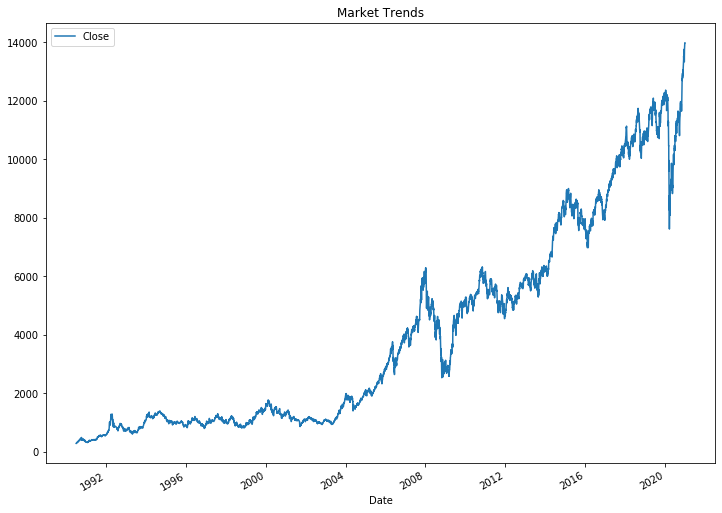

In [6]:
data.plot(figsize=(12, 9))
plt.legend(loc='best')
plt.title('Market Trends')
plt.show(block=False)

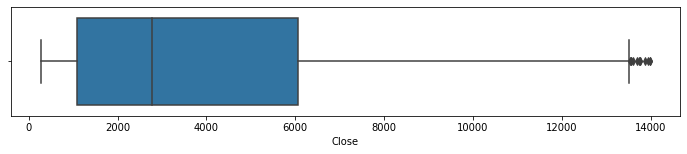

In [7]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Close'],whis=1.5)

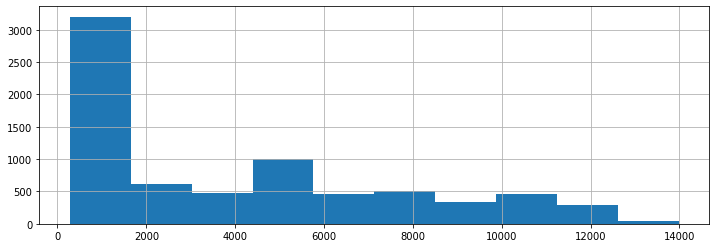

In [8]:
fig = data.Close.hist(figsize = (12,4))

### Skewness and Kurtosis

Skewness: %f 0.8137059006779593
Kurtosis: -0.579865


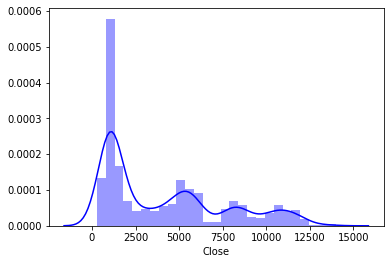

In [9]:
sns.distplot(data['Close'], color = 'blue')
print('Skewness: %f', data['Close'].skew())
print("Kurtosis: %f" % data['Close'].kurt())

# It appears that there is only mild skewness in the data

## Time series Decomposition

### Additive seasonal decomposition

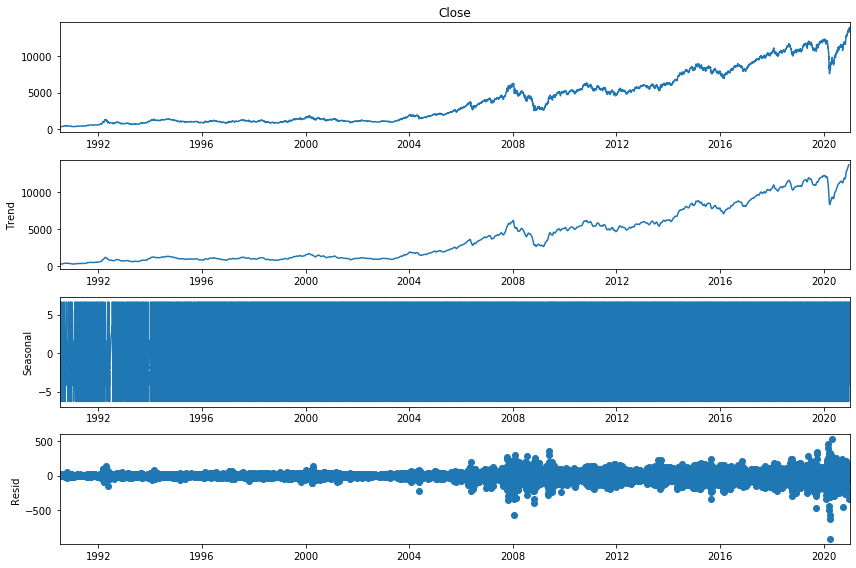

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Close, model='additive', period=12) # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

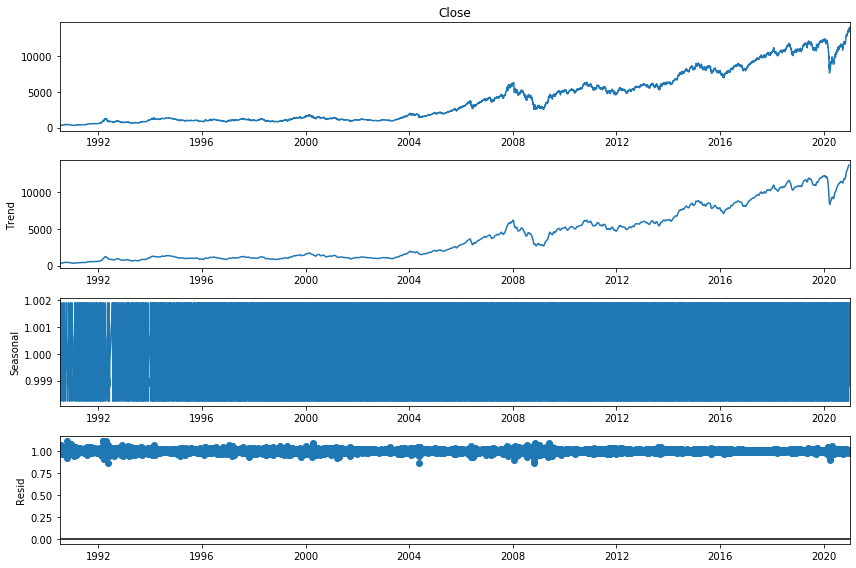

In [11]:
decomposition = sm.tsa.seasonal_decompose(data.Close, model='multiplicative', period=12) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#### Stationarity in time series

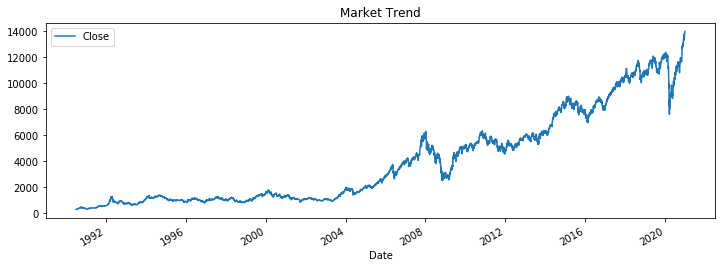

In [12]:
data['Close'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Market Trend')
plt.show(block=False)

#### Autocorrelation

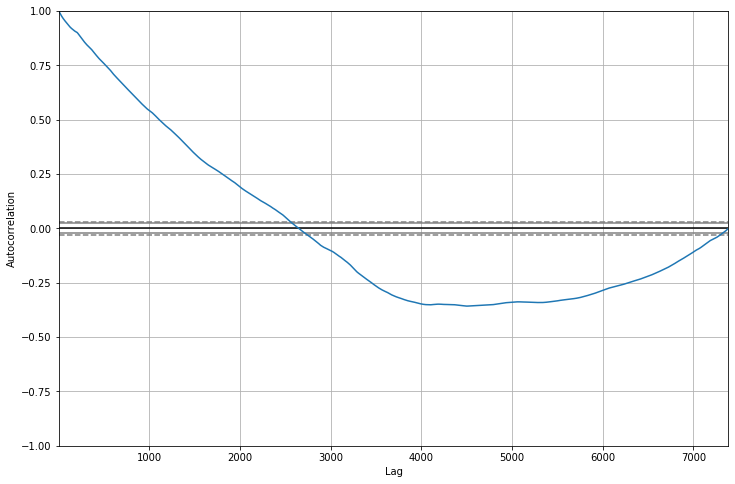

In [13]:
pd.plotting.autocorrelation_plot(data)

### ADF and KPSS Tests

#### Augmented Dickey-Fuller (ADF) test

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Close'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 1.022223
Critical Values @ 0.05: -2.86
p-value: 0.994495


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [15]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Close'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 17.907376
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### Box Cox transformation to make variance constant

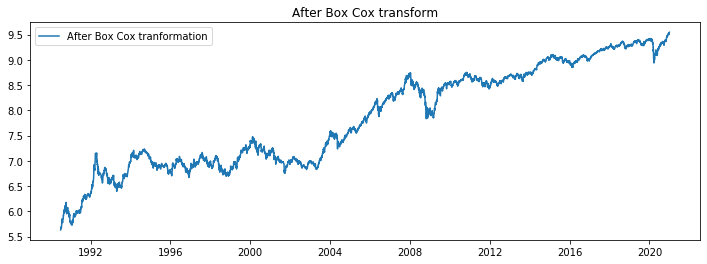

In [16]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Close'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

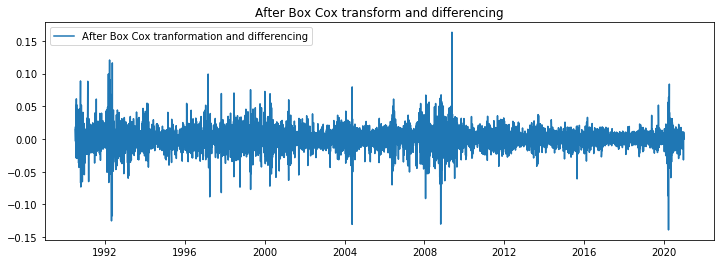

In [17]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [18]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()

Date
2020-12-24    0.010834
2020-12-28    0.008975
2020-12-29    0.004272
2020-12-30    0.003536
2020-12-31   -0.000014
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [19]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -16.063162
Critical Values @ 0.05: -2.86
p-value: 0.000000


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [20]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.074794
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Autocorrelation function (ACF)

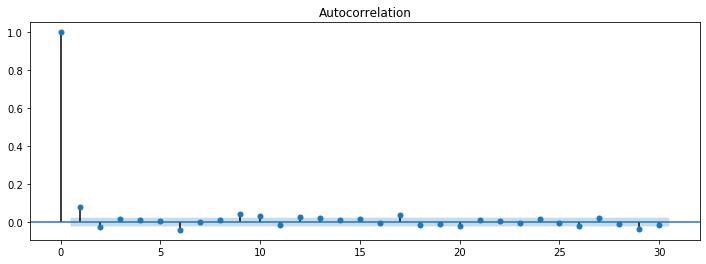

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

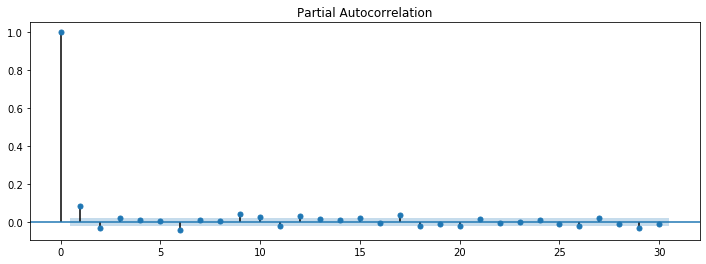

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Build and evaluate time series forecast models

### Split time series data into training and test set

In [23]:
train_len = 6000
train = data[0:train_len] # first 6000 days as training set
test = data[train_len:] # remaining days as out-of-time test set

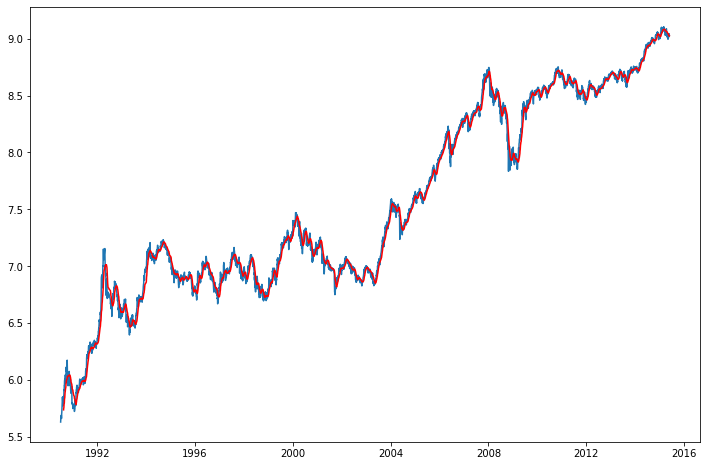

In [24]:
train_log = np.log(train) 
test_log = np.log(test)
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [25]:
train.head()

,Close
Date,
1990-07-03,279.02
1990-07-05,284.04
1990-07-06,289.04
1990-07-09,289.69
1990-07-10,288.69


## Building ML Models

### 1. ARIMA

In [26]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data['Close'], order=(1,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 7385
Model:                 ARIMA(1, 2, 2)   Log Likelihood              -41183.746
Method:                       css-mle   S.D. of innovations             63.889
Date:                Sun, 12 Jun 2022   AIC                          82377.493
Time:                        12:06:20   BIC                          82412.029
Sample:                             2   HQIC                         82389.361
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.000      1.892      0.059    -2.4e-05       0.001
ar.L1.D2.Close    -0.8802      0.045    -19.465      0.000      -0.969      -0.792
ma.L1.D2.Close    -0.1019      0.042

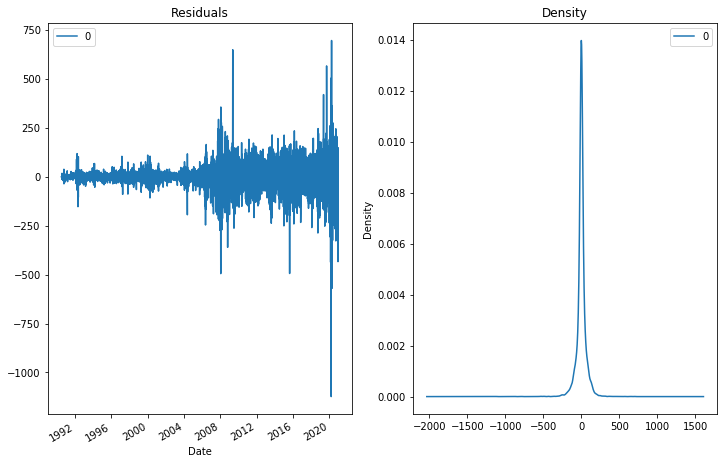

In [27]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


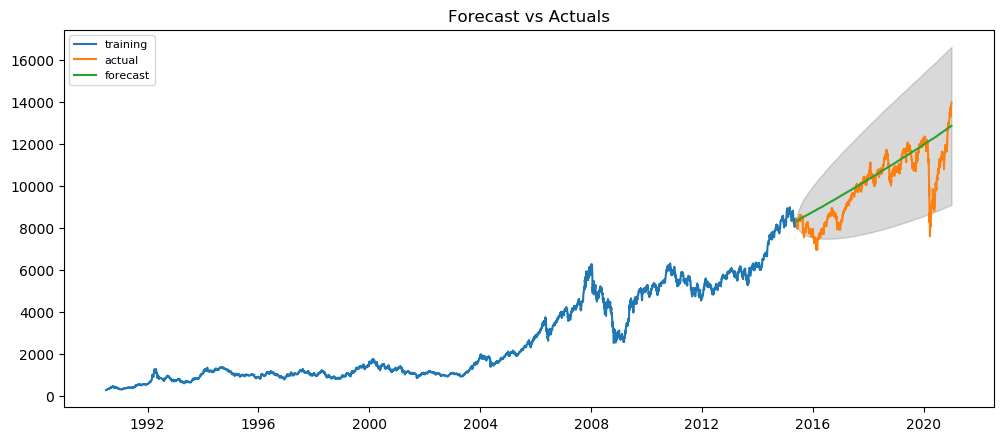

In [28]:
model_best = ARIMA(train, order=(1,2,2))  
fitted = model_best.fit(disp=-1)

fc, se, conf = fitted.forecast(1387, alpha=0.05) 

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [29]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mse = np.mean((forecast-actual)**2)
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]# corr
            
    return({'mape':mape, 'me':me, 'mse':mse,'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test['Close'])

{'mape': 0.07403084845270634,
 'me': 540.7465919927783,
 'mse': 959962.2663377062,
 'mae': 679.3485079465327,
 'mpe': 0.06211423137221213,
 'rmse': 979.7766410451446,
 'corr': 0.8435139655547333}

MAPE=7.4%, it implies that the Model is 92.6% accurate.

#### Future Forecasts

In [30]:
from pmdarima.arima import auto_arima
import pmdarima as pm

model = pm.auto_arima(data.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=82380.459, Time=5.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82386.835, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82386.413, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=82386.553, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82391.050, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=82383.304, Time=6.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=82383.486, Time=3.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=82381.726, Time=0.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=82381.677, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=82385.394, Time=4.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=82383.088, Time=1.30 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 23.042 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

## 2. SARIMA

In [31]:
data = data.reset_index()
y = data.Close
y.head()

0    279.02
1    284.04
2    289.04
3    289.69
4    288.69
Name: Close, dtype: float64

C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


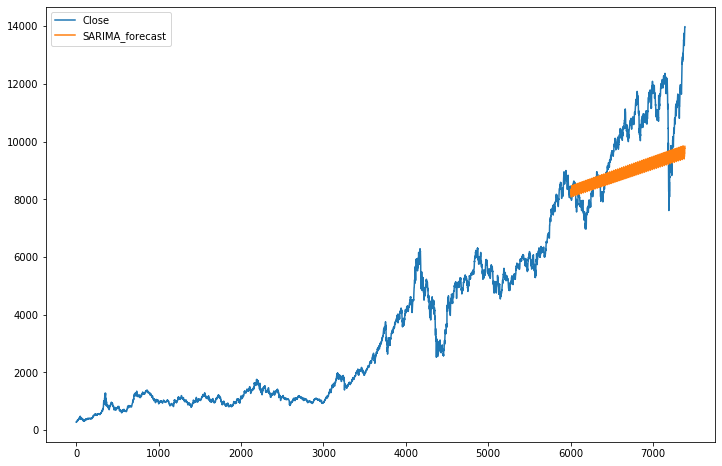

In [32]:
import statsmodels.api as sm

train_len = 6000
train = y[0:train_len]
test = y[train_len:]

model=sm.tsa.statespace.SARIMAX(train,order=(0, 0, 1),seasonal_order=(1,1,1,24))
results=model.fit()

data['SARIMA_forecast']=results.predict(start=6001,end=7387,dynamic=True)
data[['Close','SARIMA_forecast']].plot(figsize=(12,8))

In [33]:
forecast_accuracy(data.SARIMA_forecast[train_len:], test.values)

{'mape': 0.12079242916166742,
 'me': -994.6803620851479,
 'mse': 2446030.346736425,
 'mae': 1289.795807946794,
 'mpe': -0.08314115874217486,
 'rmse': 1563.9790109641579,
 'corr': nan}

## 3. SARIMAX

C:\Users\BHARAT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


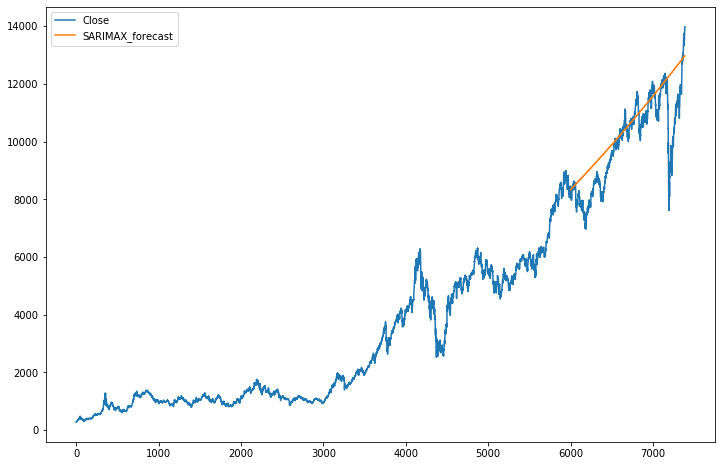

In [34]:
model=sm.tsa.statespace.SARIMAX(train,order=(0, 2, 2),seasonal_order=(1,1,1,24))
results=model.fit()

data['SARIMAX_forecast']=results.predict(start=6001,end=7387,dynamic=True)
data[['Close','SARIMAX_forecast']].plot(figsize=(12,8))

In [35]:
forecast_accuracy(data.SARIMAX_forecast[train_len:], test.values)

{'mape': 0.07628424121834983,
 'me': 593.9564860590242,
 'mse': 1022568.3042753665,
 'mae': 700.2105826720099,
 'mpe': 0.0671620922331801,
 'rmse': 1011.221194534295,
 'corr': nan}

### 4. Neural Prophet

In [36]:
# !pip install neuralprophet[live]

In [37]:
from neuralprophet import NeuralProphet

In [38]:
data = pd.read_csv('NIFTY_50.csv')
data['Date'] = pd.to_datetime(data['Date'],  dayfirst = True)
data = data.drop(['Open', 'High', 'Low', 'Volume', 'Turnover'], axis = 1)
data.head()

,Date,Close
0,1990-07-03,279.02
1,1990-07-05,284.04
2,1990-07-06,289.04
3,1990-07-09,289.69
4,1990-07-10,288.69


In [39]:
prcp_data = data.rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']]
prcp_data.head()

,ds,y
0,1990-07-03,279.02
1,1990-07-05,284.04
2,1990-07-06,289.04
3,1990-07-09,289.69
4,1990-07-10,288.69


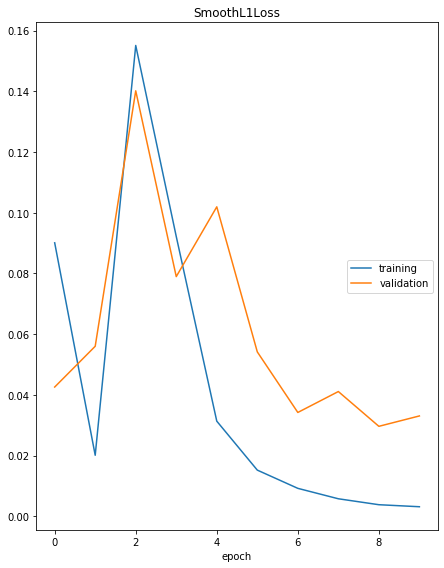

Epoch[10/10]: 100%|█| 10/10 [00:09<00:00,  1.09it/s, SmoothL1Loss=0.00316, MAE=302, MSE=2.18e+5, RegLoss=0, MAE_val=1.3


In [40]:
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, valid_p=0.2, freq='D', plot_live_loss=True, epochs=10)

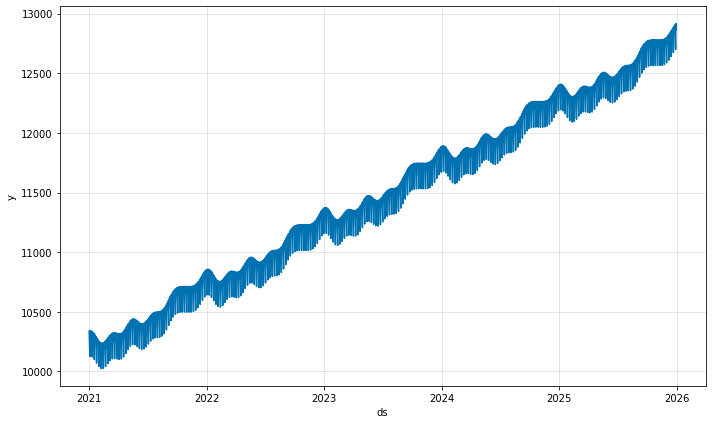

In [41]:
future = model.make_future_dataframe(prcp_data, periods=365*5)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

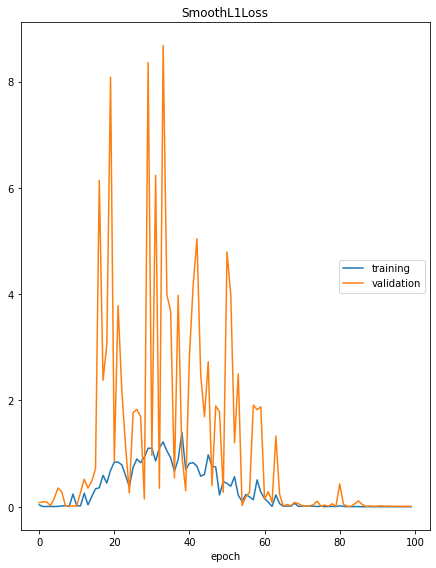

Epoch[100/100]: 100%|█| 100/100 [00:55<00:00,  1.81it/s, SmoothL1Loss=0.00142, MAE=223, MSE=9.79e+4, RegLoss=0.0351, MA


In [42]:
data = pd.read_csv('NIFTY_50.csv')
data['Date'] = pd.to_datetime(data['Date'],  dayfirst = True)
prcp_data = data.rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']]
model = NeuralProphet(n_changepoints=100, trend_reg=0.05, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
metrics = model.fit(prcp_data, validate_each_epoch=True, valid_p=0.2, freq='D', plot_live_loss=True, epochs=100)

In [43]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

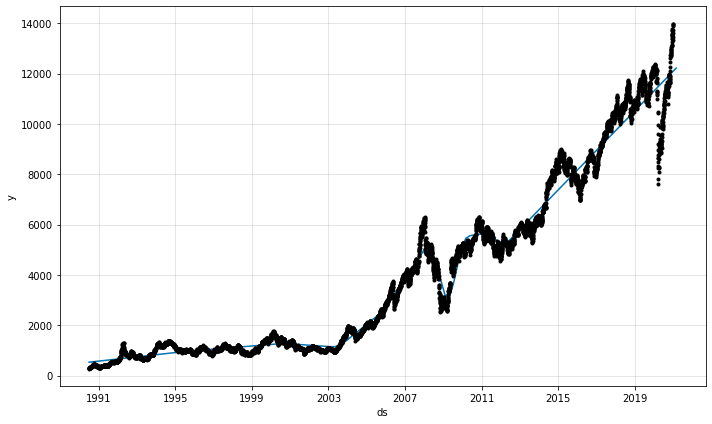

In [44]:
plot_forecast(model, prcp_data, periods=60)

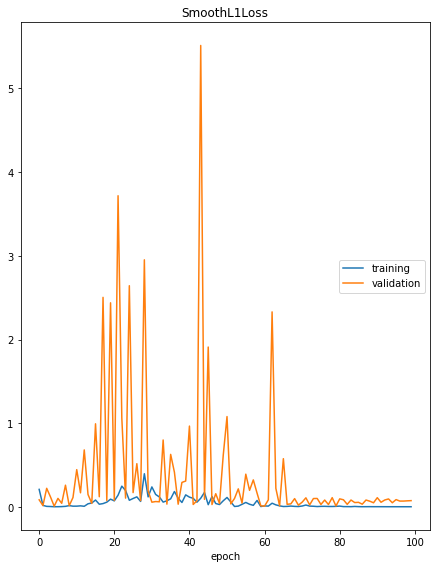

Epoch[100/100]: 100%|█| 100/100 [01:09<00:00,  1.44it/s, SmoothL1Loss=0.00393, MAE=356, MSE=2.71e+5, RegLoss=0.0289, MA


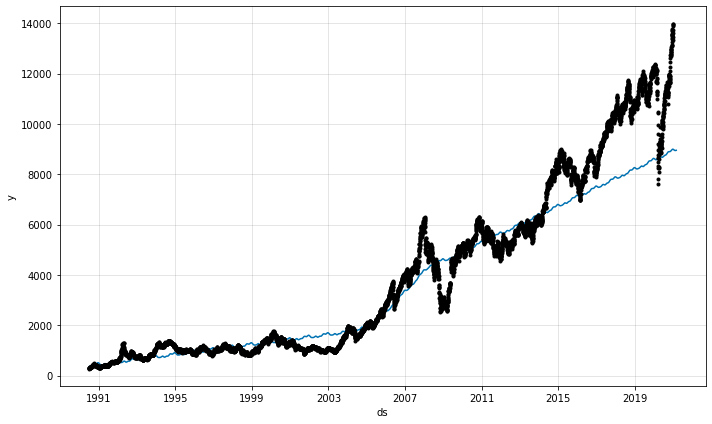

In [45]:
model = NeuralProphet(n_changepoints=100, trend_reg=0.5, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
metrics = model.fit(prcp_data, validate_each_epoch=True, valid_p=0.2, freq='D', plot_live_loss=True, epochs=100)
plot_forecast(model, prcp_data, periods=60)

### 5. LSTM

In [47]:
data = pd.read_csv('NIFTY_50.csv')
data['Date'] = pd.to_datetime(data['Date'],  dayfirst = True)
data = data.set_index('Date')
lstm_data = data.drop(['Open', 'High', 'Low', 'Volume', 'Turnover'], axis = 1)
lstm_data.head()

,Close
Date,
1990-07-03,279.02
1990-07-05,284.04
1990-07-06,289.04
1990-07-09,289.69
1990-07-10,288.69


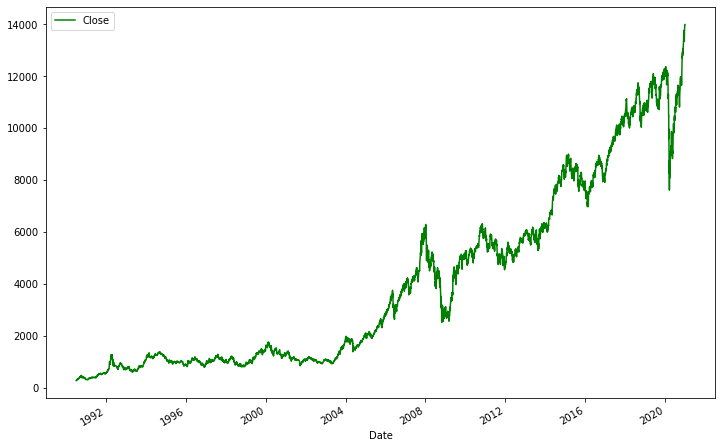

In [48]:
lstm_data.plot(color='green')

In [49]:
# Defining a function to make samples from univariate sequence
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence)-1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [50]:
y = data.Close
y.head()

Date
1990-07-03    279.02
1990-07-05    284.04
1990-07-06    289.04
1990-07-09    289.69
1990-07-10    288.69
Name: Close, dtype: float64

In [51]:
n_steps = 3
lstm_sequence = y.tolist()
X, Y = sampling(lstm_sequence, n_steps)

In [52]:
# Defining the model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
# Reshaping the X array.
X = X.reshape((X.shape[0], X.shape[1], 1))

# Checking the summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [54]:
# fit the data in the model
model.fit(X, Y, epochs=200, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [55]:
# Predicting the next value using our trained model
ypred = model.predict(X, verbose=0)
ypred

array([[  286.66202],
       [  288.04233],
       [  287.62646],
       ...,
       [13756.306  ],
       [13827.88   ],
       [13883.064  ]], dtype=float32)

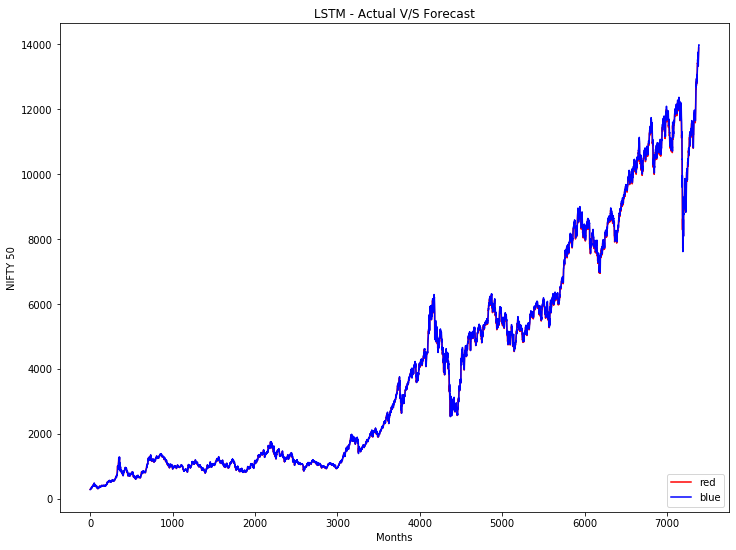

In [56]:
x1 = list(range(0, 7387))
x2 = list(range(0, 7384))
 
# plotting
plt.figure(figsize=(12, 9))
plt.title("LSTM - Actual V/S Forecast")
plt.xlabel("Months")
plt.ylabel("NIFTY 50")
plt.plot(x2, ypred, color ="red")
plt.plot(x1, lstm_data, color ="blue")
plt.legend(["red", "blue"], loc ="lower right")
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error
lstm_data_mape = lstm_data.reset_index(drop=True, inplace=False)
ypred_df = pd.DataFrame(ypred, columns=['ypred'])
mape = mean_absolute_error(lstm_data_mape.iloc[:7384], ypred_df)/(10**4)
print("mape :",mape)

mape : 0.005134239900053774


In [58]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(lstm_data_mape.iloc[:7384], ypred_df, squared=True)/100
print("rmse :",rms)

rmse : 72.67773285186878
